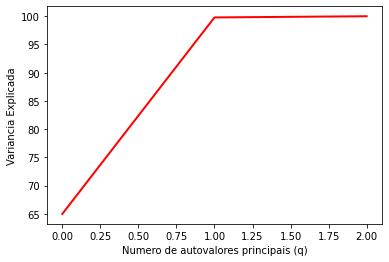

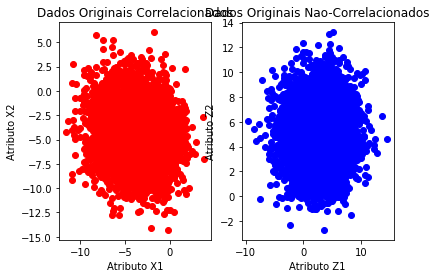

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gera dados gaussianos com atributos não-correlacionados
m1 = 5  # Média teórica do atributo 1
sig1 = 1  # Desvio-padrao teorico do atributo 1

m2 = -5  # Média teórica do atributo 2
sig2 = sig1  # Desvio-padrao teorico do atributo 2

m3 = 0  # Média teórica do atributo 3
sig3 = sig1  # Desvio-padrao teorico do atributo 3

N = 50000  # Quantidade de observacoes geradas de cada atributo
X1 = np.random.normal(m1, sig1, N)
X2 = np.random.normal(m2, sig2, N)
X3 = np.random.normal(m3, sig3, N)

Xu = np.vstack((X1, X2, X3))  # Agrupa dados dos atributos em uma unica matriz

# Matriz desejada para os dados
Cd = np.array([[1, 1.8, -0.9], [1.8, 4, 0.6], [-0.9, 0.6, 9]])

R = np.linalg.cholesky(Cd)  # Decomposicao de Cholesky da matriz Cd

Xc = np.dot(R.T, Xu)  # Gera dados com atributos correlacionados com a matriz COV desejada

# Aplicacao de PCA aos dados correlacionados gerados no procedimento anterior.
Cx = np.cov(Xc)  # Estima a matriz de covariancia dos dados simulados
L, V = np.linalg.eig(Cx)
sorted_indices = np.argsort(L)[::-1]
L = L[sorted_indices]
V = V[:, sorted_indices]
VEi = 100 * L / np.sum(L)  # Variancia explicada pelo i-esimo autovalor
VEq = 100 * np.cumsum(L) / np.sum(L)  # Variancia explicada pelos q primeiros autovalores

plt.figure()
plt.plot(VEq, 'r-', linewidth=2)
plt.xlabel('Numero de autovalores principais (q)')
plt.ylabel('Variancia Explicada')
plt.show()

# Calcula autovalores e autovetores da matriz Cx
_, _, V2 = np.linalg.svd(Cx)
VEq2 = np.cumsum(VEi)

U3, L3, V3 = np.linalg.svd(Cx)  # PCA a partir da SVD

Q = V.T  # Monta matriz de transformacao (sem reducao de dimensionalidade)
# Q = V2.T
# Q = V3.T

Z = np.dot(Q, Xc)  # Gera dados via PCA (descorrelaciona matriz dos dados)

Cz = np.cov(Z)  # Matriz de covariancia empirica dos dados transformados via PCA

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(Xc[0, 0:5000], Xc[1, 0:5000], 'ro', linewidth=2)
plt.xlabel('Atributo X1')
plt.ylabel('Atributo X2')
plt.title('Dados Originais Correlacionados')

plt.subplot(1, 2, 2)
plt.plot(Z[0, 0:5000], Z[1, 0:5000], 'bo', linewidth=2)
plt.xlabel('Atributo Z1')
plt.ylabel('Atributo Z2')
plt.title('Dados Originais Nao-Correlacionados')

# Reconstrucao dos dados originais
Xr = np.dot(Q.T, Z)  # Conjunto de dados original recuperado a partir de Z

E = Xc - Xr  # Vetor erro de reconstrucao
NormaE2 = np.linalg.norm(E, 'fro')**2  # Norma de Frobenius para calcular o erro.

E = E.flatten()  # Vetoriza matriz de erro
SSE = np.sum(E**2)  # Soma dos erros quadraticos de reconstrucao

plt.show()
